In [1]:
import os
import sys
sys.path.insert(0, os.path.relpath('../../../../..')) 



In [2]:

from recidiviz.calculator.modeling.population_projection.super_simulation.super_simulation_factory import SuperSimulationFactory
from recidiviz.calculator.modeling.population_projection.transition_table import TransitionTable
from recidiviz.calculator.modeling.population_projection.spark_policy import SparkPolicy
from recidiviz.calculator.modeling.population_projection.shell_compartment import ShellCompartment
import pandas as pd
from functools import partial
import yaml
%config Completer.use_jedi = False

In [ ]:
test_sim = SuperSimulationFactory.build_super_simulation('../state/NY/mms/ny_state_prison_model_inputs.yaml')
# commented this out once I'm working on the policy but this should be the first thing you run to make sure the simulation is functional
test_sim.simulate_baseline(['prison', 'release'])

/Users/pacopoler/.local/share/virtualenvs/pulse-data-Jd9N3JcA/lib/python3.8/site-packages/google/cloud/bigquery/table.py:1767: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  record_batch = self.to_arrow(


outflows_data returned 19789 results
transitions_data returned 12504 results


crime_type                             compartment  outflow_to
AGG DWI:1 PRIOR CONV-10 YRS|E          pre-trial    prison        54.761905
AGG DWI:2 PRIOR CONV-10 YRS|D          pre-trial    prison        62.301587
AGG DWI:W/CHILD|E                      pre-trial    prison        62.698413
AGG UNLIC OPER MV 1ST|E                pre-trial    prison        43.650794
AGGRAVATED ASSAULT/PEACE OFF.|B        pre-trial    prison        97.222222
AGGRAVATED CRIM CONTEMPT|D             pre-trial    prison        46.428571
AGGRAVATED FAMILY OFFENSE|E            pre-trial    prison        69.047619
AGGRAVATED MURDER|A1                   pre-trial    prison        98.412698
AGGRAVATED SEXUAL ABUSE 1ST|B          pre-trial    prison        96.031746
AGGRAVATED VEHICULAR ASSAULT|C         pre-trial    prison        74.206349
AGGRAVATED VEHICULAR HOMICIDE|B        pre-trial    prison        66.269841
ARSON 1ST|A1                           pre-trial    prison        96.825397
ARSON 2ND|B              

total_population_data returned 152 results


/Users/pacopoler/.local/share/virtualenvs/pulse-data-Jd9N3JcA/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [5]:
import numpy as np
np.average(test_sim.initializer.data_dict['transitions_data'].compartment_duration,
        weights=test_sim.initializer.data_dict['transitions_data'].total_population)



37.98275114845355

In [7]:
pd.set_option('display.max_rows', 500)
mms = pd.read_csv('../state/NY/mms/crime_to_mm.csv')
mms.index = mms.CRIME
val_mms = mms.copy()
val_mms.weight /= val_mms.weight.sum()
val_mms.sort_values('MM')

,CRIME,MM,affected_fraction,weight
CRIME,,,,
AGG DWI:1 PRIOR CONV-10 YRS|E,AGG DWI:1 PRIOR CONV-10 YRS|E,0.0,0.000000,0.001791
AGG DWI:2 PRIOR CONV-10 YRS|D,AGG DWI:2 PRIOR CONV-10 YRS|D,0.0,0.000000,0.000960
DWI:ALCOHOL/DRUGS-3RD OFFENSE|D,DWI:ALCOHOL/DRUGS-3RD OFFENSE|D,0.0,0.000000,0.014997
DWI:ALCOHOL/DRUGS-2ND OFFENSE|E,DWI:ALCOHOL/DRUGS-2ND OFFENSE|E,0.0,0.000000,0.020551
AGG DWI:W/CHILD|E,AGG DWI:W/CHILD|E,0.0,0.000000,0.000791
CRIM POSS MARIHUANA 1ST|C,CRIM POSS MARIHUANA 1ST|C,1.0,0.035714,0.000975
CRIM POSS FORGED INST 1ST|C,CRIM POSS FORGED INST 1ST|C,1.0,0.261438,0.000761
CRIM POSS CONTR SUBSTANCE 4TH|C,CRIM POSS CONTR SUBSTANCE 4TH|C,1.0,0.025017,0.014719
SEXUAL ABUSE 1ST|D,SEXUAL ABUSE 1ST|D,1.0,0.008944,0.008902


In [6]:
mms.affected_fraction.describe()

count    160.000000
mean       0.089073
std        0.123691
min        0.000000
25%        0.000000
50%        0.052551
75%        0.137719
max        0.714286
Name: affected_fraction, dtype: float64

In [9]:
pd.set_option('display.max_rows', 500)
MM_AFFECTED = 0.1

# Policy Option Methods



def abolish_mm(crime, retroactive=False):
    return partial(TransitionTable.abolish_mandatory_minimum,
                   historical_outflows=test_sim.simulator.pop_simulations['baseline_projections'].sub_simulations['crime'].simulation_compartments['prison']
                   outflow='release',
                   retroactive=retroactive,
                   affected_fraction=MM_AFFECTED,
)

policy_list_non_retroactive = [
    SparkPolicy(policy_fn=abolish_mm(crime),
                spark_compartment='prison',
                sub_population={'crime_type': crime},
                policy_ts=5)
        for crime in mms.index
]
    
test_results = test_sim.simulate_policy(policy_list_non_retroactive, 'prison')

crime_type                             compartment  outflow_to
AGG DWI:1 PRIOR CONV-10 YRS|E          pre-trial    prison        54.761905
AGG DWI:2 PRIOR CONV-10 YRS|D          pre-trial    prison        62.301587
AGG DWI:W/CHILD|E                      pre-trial    prison        62.698413
AGG UNLIC OPER MV 1ST|E                pre-trial    prison        43.650794
AGGRAVATED ASSAULT/PEACE OFF.|B        pre-trial    prison        97.222222
AGGRAVATED CRIM CONTEMPT|D             pre-trial    prison        46.428571
AGGRAVATED FAMILY OFFENSE|E            pre-trial    prison        69.047619
AGGRAVATED MURDER|A1                   pre-trial    prison        98.412698
AGGRAVATED SEXUAL ABUSE 1ST|B          pre-trial    prison        96.031746
AGGRAVATED VEHICULAR ASSAULT|C         pre-trial    prison        74.206349
AGGRAVATED VEHICULAR HOMICIDE|B        pre-trial    prison        66.269841
ARSON 1ST|A1                           pre-trial    prison        96.825397
ARSON 2ND|B              

TypeError: abolish_mandatory_minimum() missing 1 required positional argument: 'historical_outflows'

In [8]:
import numpy as np
average_dev = 0
total = test_sim.initializer.data_dict['transitions_data'].total_population.sum()
for crime in test_sim.initializer.data_dict['transitions_data'].crime_type.unique():
    crime_data = test_sim.initializer.data_dict['transitions_data'][
        test_sim.initializer.data_dict['transitions_data'].crime_type == crime]
    average_duration = np.average(
            crime_data.compartment_duration,
            weights=crime_data.total_population,
        )
    
    variance = np.average((crime_data.compartment_duration - average_duration) ** 2,

                           weights=crime_data.total_population)
    std = np.sqrt(variance)
    average_dev += std * crime_data.total_population.sum() / total * mms.loc[crime, 'affected_fraction']
average_dev

2.5332308714026635

In [10]:
simulation_tag = 'NY_mms_10%'
test_sim.upload_simulation_results_to_bq(simulation_tag)

../../../../../recidiviz/calculator/modeling/population_projection/simulations/super_simulation/initializer.py:172: UserWarning: Outflows data is missing for more than 25.0% for some disaggregations:
crime_type                             compartment  outflow_to
AGG DWI:1 PRIOR CONV-10 YRS|E          pre-trial    prison        54.761905
AGG DWI:2 PRIOR CONV-10 YRS|D          pre-trial    prison        62.301587
AGG DWI:W/CHILD|E                      pre-trial    prison        62.698413
AGG UNLIC OPER MV 1ST|E                pre-trial    prison        43.650794
AGGRAVATED ASSAULT/PEACE OFF.|B        pre-trial    prison        97.222222
AGGRAVATED CRIM CONTEMPT|D             pre-trial    prison        46.428571
AGGRAVATED FAMILY OFFENSE|E            pre-trial    prison        69.047619
AGGRAVATED MURDER|A1                   pre-trial    prison        98.412698
AGGRAVATED SEXUAL ABUSE 1ST|B          pre-trial    prison        96.031746
AGGRAVATED VEHICULAR ASSAULT|C         pre-trial    p

In [18]:
_, data_inputs, _, time_step, reference_year = test_sim._get_simulation_inputs()
test_sim.simulator.get_sub_group_ids_dict()

../../../../../recidiviz/calculator/modeling/population_projection/simulations/super_simulation/initializer.py:190: UserWarning: Outflows data is missing for more than 25.0% for some disaggregations:
crime_type                             compartment  outflow_to
AGG DWI:1 PRIOR CONV-10 YRS|E          pre-trial    prison        53.174603
AGG DWI:2 PRIOR CONV-10 YRS|D          pre-trial    prison        61.111111
AGG DWI:W/CHILD|E                      pre-trial    prison        65.476190
AGGRAVATED ASSAULT/PEACE OFF.|B        pre-trial    prison        96.428571
AGGRAVATED FAMILY OFFENSE|E            pre-trial    prison        70.238095
AGGRAVATED MURDER|A1                   pre-trial    prison        97.222222
AGGRAVATED SEXUAL ABUSE 1ST|B          pre-trial    prison        94.444444
AGGRAVATED VEHICULAR ASSAULT|C         pre-trial    prison        72.222222
AGGRAVATED VEHICULAR HOMICIDE|B        pre-trial    prison        63.492063
ARSON 1ST|A1                           pre-trial    p

{'AGG DWI:1 PRIOR CONV-10 YRS|E': {'crime_type': 'AGG DWI:1 PRIOR CONV-10 YRS|E'},
 'AGG DWI:2 PRIOR CONV-10 YRS|D': {'crime_type': 'AGG DWI:2 PRIOR CONV-10 YRS|D'},
 'AGG DWI:W/CHILD|E': {'crime_type': 'AGG DWI:W/CHILD|E'},
 'AGG UNLIC OPER MV 1ST|E': {'crime_type': 'AGG UNLIC OPER MV 1ST|E'},
 'AGGRAVATED ASSAULT/PEACE OFF.|B': {'crime_type': 'AGGRAVATED ASSAULT/PEACE OFF.|B'},
 'AGGRAVATED CRIM CONTEMPT|D': {'crime_type': 'AGGRAVATED CRIM CONTEMPT|D'},
 'AGGRAVATED FAMILY OFFENSE|E': {'crime_type': 'AGGRAVATED FAMILY OFFENSE|E'},
 'AGGRAVATED MURDER|A1': {'crime_type': 'AGGRAVATED MURDER|A1'},
 'AGGRAVATED SEXUAL ABUSE 1ST|B': {'crime_type': 'AGGRAVATED SEXUAL ABUSE 1ST|B'},
 'AGGRAVATED VEHICULAR ASSAULT|C': {'crime_type': 'AGGRAVATED VEHICULAR ASSAULT|C'},
 'AGGRAVATED VEHICULAR HOMICIDE|B': {'crime_type': 'AGGRAVATED VEHICULAR HOMICIDE|B'},
 'ARSON 1ST|A1': {'crime_type': 'ARSON 1ST|A1'},
 'ARSON 2ND|B': {'crime_type': 'ARSON 2ND|B'},
 'ARSON 3RD|C': {'crime_type': 'ARSON 3RD|C'}

In [10]:
test_sim_short = SuperSimulationFactory.build_super_simulation('../state/NY/mms/ny_state_prison_model_inputs.yaml')


test_sim_short.initializer.data_dict['outflows_data'] = test_sim_short.initializer.data_dict['outflows_data'][test_sim_short.initializer.data_dict['outflows_data'].crime_type == 'ATT BURGLARY 3RD|E']
test_sim_short.initializer.data_dict['transitions_data'] = test_sim_short.initializer.data_dict['transitions_data'][test_sim_short.initializer.data_dict['transitions_data'].crime_type == 'ATT BURGLARY 3RD|E']
test_sim_short.initializer.data_dict['total_population_data'] = test_sim_short.initializer.data_dict['total_population_data'][test_sim_short.initializer.data_dict['total_population_data'].crime_type == 'ATT BURGLARY 3RD|E']


/Users/pacopoler/.local/share/virtualenvs/pulse-data-Jd9N3JcA/lib/python3.7/site-packages/google/cloud/bigquery/table.py:1770: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  create_bqstorage_client=create_bqstorage_client,


outflows_data returned 19789 results
transitions_data returned 12504 results
total_population_data returned 152 results


In [12]:
outs = test_sim_short.initializer.data_dict['outflows_data']
missing_ts = [i for i in range(1,246) if i not in outs.time_step.unique()]
for ts in missing_ts:
    test_sim_short.initializer.data_dict['outflows_data'] = outs.append({'total_population': 0, 'time_step': ts}, ignore_index=True)
test_sim_short.initializer.data_dict['outflows_data'] = test_sim_short.initializer.data_dict['outflows_data'].ffill()

In [13]:
test_sim_short.initializer.data_dict['outflows_data']

,simulation_tag,time_step,compartment,outflow_to,total_population,crime,crime_type,age,race,date_created
0,NY_CTC,7.0,pre-trial,prison,6.27,None,ATT BURGLARY 3RD|E,None,None,2021-03-12 20:17:48.043485+00:00
1,NY_CTC,8.0,pre-trial,prison,6.27,None,ATT BURGLARY 3RD|E,None,None,2021-03-12 20:17:48.043485+00:00
2,NY_CTC,20.0,pre-trial,prison,6.27,None,ATT BURGLARY 3RD|E,None,None,2021-03-12 20:17:48.043485+00:00
3,NY_CTC,29.0,pre-trial,prison,6.27,None,ATT BURGLARY 3RD|E,None,None,2021-03-12 20:17:48.043485+00:00
4,NY_CTC,32.0,pre-trial,prison,6.27,None,ATT BURGLARY 3RD|E,None,None,2021-03-12 20:17:48.043485+00:00
5,NY_CTC,35.0,pre-trial,prison,6.27,None,ATT BURGLARY 3RD|E,None,None,2021-03-12 20:17:48.043485+00:00
6,NY_CTC,38.0,pre-trial,prison,6.27,None,ATT BURGLARY 3RD|E,None,None,2021-03-12 20:17:48.043485+00:00
7,NY_CTC,52.0,pre-trial,prison,6.27,None,ATT BURGLARY 3RD|E,None,None,2021-03-12 20:17:48.043485+00:00
8,NY_CTC,69.0,pre-trial,prison,6.27,None,ATT BURGLARY 3RD|E,None,None,2021-03-12 20:17:48.043485+00:00
9,NY_CTC,78.0,pre-trial,prison,6.27,None,ATT BURGLARY 3RD|E,None,None,2021-03-12 20:17:48.043485+00:00


In [13]:
t = test_sim_short.initializer.data_dict['transitions_data']
(t.compartment_duration * t.total_population).sum() / t.total_population.sum()

25.440757316032435

initialization time:  4.8599090576171875
initialization time:  4.429825067520142
simulation_time:  4.665799140930176
simulation_time:  4.839103937149048


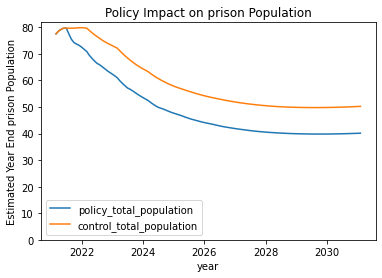

In [14]:
pd.set_option('display.max_rows', 500)

MM_AFFECTED = 0.25

# Policy Option Methods



def abolish_mm(crime, retroactive=False):
    return partial(CompartmentTransitions.abolish_mandatory_minimum, 
                   outflow='release',
                   retroactive=retroactive,
                   affected_fraction=MM_AFFECTED,
)

policy_list_non_retroactive = [
    SparkPolicy(policy_fn=abolish_mm('ATT BURGLARY 3RD|E', False),
                spark_compartment='prison',
                sub_population={'crime_type': 'ATT BURGLARY 3RD|E'},
                apply_retroactive=False)
]
    
test_results = test_sim_short.simulate_policy(policy_list_non_retroactive, 'prison')

In [15]:
t = test_sim_short.simulator.pop_simulations['policy'].sub_simulations['ATT BURGLARY 3RD|E'].\
    simulation_compartments['prison'].transition_tables
t.unnormalize_table('before')

AttributeError: 'CompartmentTransitions' object has no attribute 'transitions'

<AxesSubplot:title={'center':'LOS distribution for ATT BURGLARY 3RD|E'}, xlabel='LOS (months)', ylabel='percentage of cohort released'>

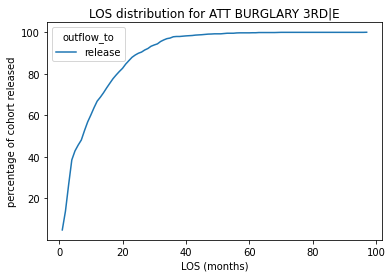

In [16]:
(t.transition_dfs['before'].cumsum()*100).plot(ylabel='percentage of cohort released', xlabel='LOS (months)', title='LOS distribution for ATT BURGLARY 3RD|E')

<AxesSubplot:title={'center':'LOS distribution for ATT BURGLARY 3RD|E'}, xlabel='LOS (months)', ylabel='percentage of cohort released'>

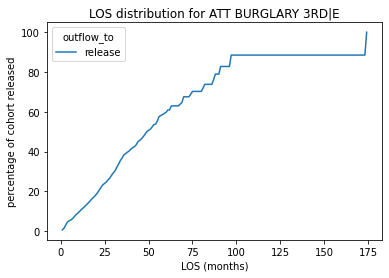

In [26]:
(t.transition_dfs['before'].cumsum()*100).plot(ylabel='percentage of cohort released', xlabel='LOS (months)', title='LOS distribution for ATT BURGLARY 3RD|E')

In [74]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


test_sim.simulator.pop_simulations['policy'].sub_simulations['CRIM SALE CONTR SUBSTANCE 3RD|B'].\
    simulation_compartments['prison'].cohorts.cohort_df.loc[120:]

,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373
120,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
121,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [70]:
test_sim.initializer.data_dict['transitions_data']

,simulation_tag,compartment_duration,compartment,outflow_to,total_population,crime,crime_type,age,race,date_created
0,NY_CTC,72.0,prison,release,0.048507,None,CRIM SALE CONTR SUBSTANCE 3RD|B,None,None,2021-03-12 20:17:48.043485+00:00
1,NY_CTC,73.0,prison,release,0.036601,None,CRIM SALE CONTR SUBSTANCE 3RD|B,None,None,2021-03-12 20:17:48.043485+00:00
2,NY_CTC,74.0,prison,release,0.043419,None,CRIM SALE CONTR SUBSTANCE 3RD|B,None,None,2021-03-12 20:17:48.043485+00:00
3,NY_CTC,75.0,prison,release,0.028369,None,CRIM SALE CONTR SUBSTANCE 3RD|B,None,None,2021-03-12 20:17:48.043485+00:00
4,NY_CTC,76.0,prison,release,0.046715,None,CRIM SALE CONTR SUBSTANCE 3RD|B,None,None,2021-03-12 20:17:48.043485+00:00
5,NY_CTC,77.0,prison,release,0.038285,None,CRIM SALE CONTR SUBSTANCE 3RD|B,None,None,2021-03-12 20:17:48.043485+00:00
6,NY_CTC,78.0,prison,release,0.033439,None,CRIM SALE CONTR SUBSTANCE 3RD|B,None,None,2021-03-12 20:17:48.043485+00:00
7,NY_CTC,79.0,prison,release,0.056013,None,CRIM SALE CONTR SUBSTANCE 3RD|B,None,None,2021-03-12 20:17:48.043485+00:00
8,NY_CTC,80.0,prison,release,0.034904,None,CRIM SALE CONTR SUBSTANCE 3RD|B,None,None,2021-03-12 20:17:48.043485+00:00
9,NY_CTC,81.0,prison,release,0.036166,None,CRIM SALE CONTR SUBSTANCE 3RD|B,None,None,2021-03-12 20:17:48.043485+00:00
